In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 匯入檔案並觀察尖峰負載
- 檔案說明:
    - 20170101-20181130.csv:20170101-20181130 台電提供數據
    - 20180101-20190131.csv:20180101-20190131 台電提供數據
- 變數:
    - power2017_2018:20170101-2017-12-31的電力尖峰負載(MW)
    - power2017_2018:20180101-2019-01-31的電力尖峰負載(MW)

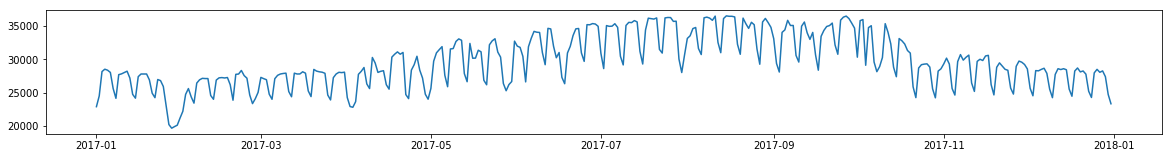

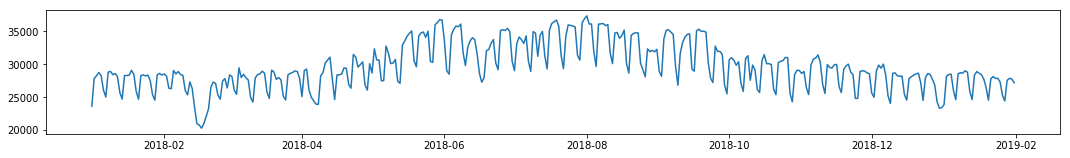

In [70]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y%m%d')
df1 = pd.read_csv('20170101-20181130.csv',encoding="utf_8_sig",engine='python',parse_dates=['日期'],date_parser = dateparse,index_col= 0)
df2 = pd.read_csv('20180101-20190131.csv',encoding="utf_8_sig",engine='python',parse_dates=['日期'],date_parser = dateparse,index_col= 0)
power2017_2018 = df1['尖峰負載(MW)']['2017-01-01':'2017-12-31']
power2018_2019 = df2['尖峰負載(MW)']
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
plt.plot(power2017_2018)
plt.figure(figsize=(40,5))
plt.subplot(2,2,1)
plt.plot(power2018_2019)

## 由上圖可以看出電力尖峰負載，夏天比較高，冬天比較低，而走向是差不多的。

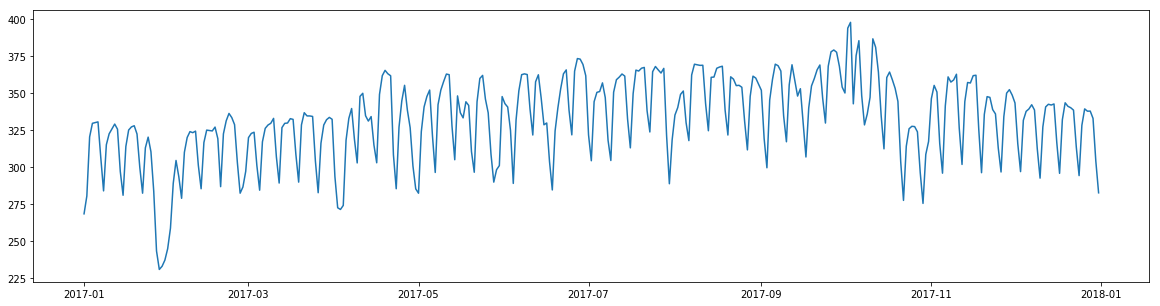

In [67]:
industry = df1['工業用電(百萬度)']['2017-01-01':'2017-12-31']
plt.figure(figsize=(20,5))
plt.plot(industry)

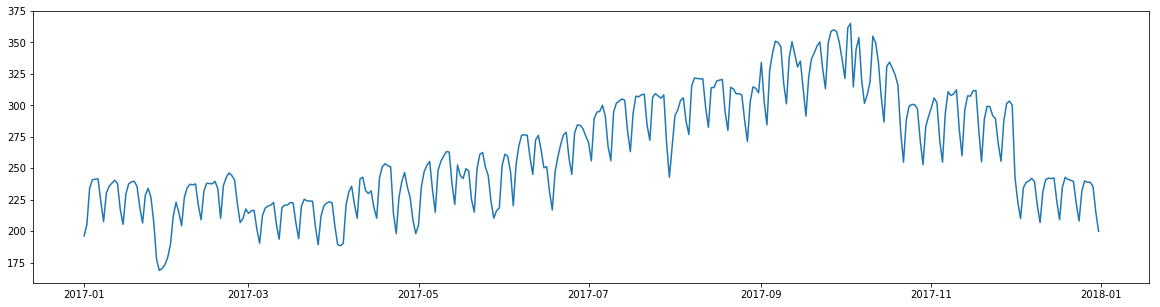

In [68]:
famliy = df1['民生用電(百萬度)']['2017-01-01':'2017-12-31']
plt.figure(figsize=(20,5))
plt.plot(famliy)

## 以上觀察 "工業用電" 與 "民生用電" 是否會與尖峰負載走向相關

# 影響電力消耗因素之一 => 溫度
- 考慮到夏天與冬天溫度不相同，最直接影響用電量的方式就是開冷氣或開暖氣，所以決定參考溫度來預測電力
- 變數說明:
    - weather:2017年每天最高溫度
    - 綠色曲線:2017年電力尖峰負載
    - 紅色曲線:2017年每日最高溫度

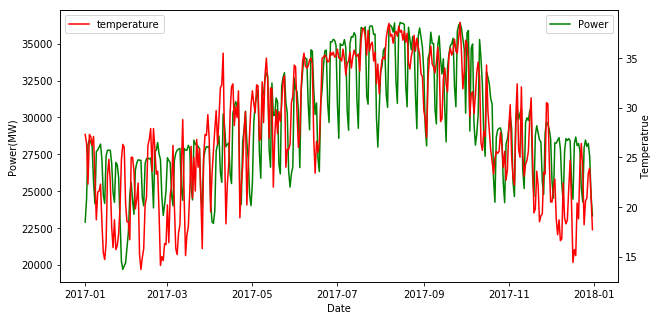

In [74]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d')
weather = pd.read_csv('weather.csv',encoding="utf_8_sig",engine='python',parse_dates=['date'],date_parser = dateparse,index_col= 0)
weather = weather['T Max']['2017']
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax1.plot(power2017_2018, color = 'green', label = 'Power')
ax1.set_ylabel("Power(MW)")
ax1.set_xlabel("Date")
ax2 = ax1.twinx()
ax2.plot(weather, color = 'red', label = 'temperature')
ax1.legend(loc = 0)
ax2.set_ylabel("Temperatrue")
ax2.legend(loc=2)
plt.show()

## 計算2017電力尖峰負載與2017每日最高溫度的相關係數

In [75]:
df_corr = power2017_2018.corr(weather)
df_corr

0.7442239712606796

## 觀察溫度是否會依星期幾而有關係變化
- 變數:
    - Monday : 2017年星期一的日期
    - Tuesday : 2017年星期二的日期
    - Wednesday : 2017年星期三的日期
    - Thursday : 2017年星期四的日期
    - Friday : 2017年星期五的日期
    - Saturday : 2017年星期六的日期
    - Sunday : 2017年星期日的日期

In [267]:
weekday = pd.Series(power2017_2018.index)
Sunday = []
Monday = []
Tuesday = []
Wednesday = []
Thursday = []
Friday = []
Saturday = []
for i in weekday:
    if i.weekday() == 0:
        Monday.append(i)
    elif i.weekday() == 1:
        Tuesday.append(i)
    elif i.weekday() == 2:
        Wednesday.append(i)
    elif i.weekday() == 3:
        Thursday.append(i)
    elif i.weekday() == 4:
        Friday.append(i)
    elif i.weekday() == 5:
        Saturday.append(i)
    else:
        Sunday.append(i)

## 星期幾與最高溫度關係圖

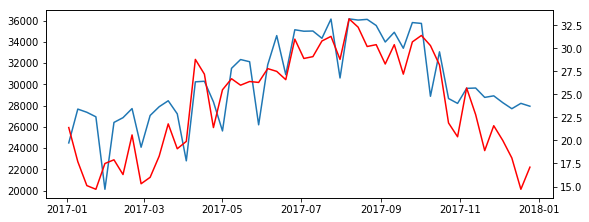

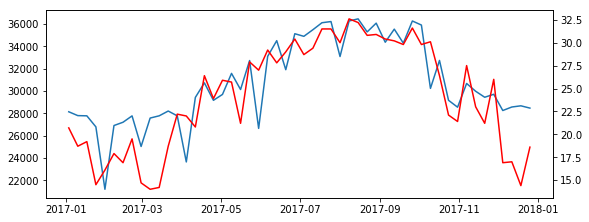

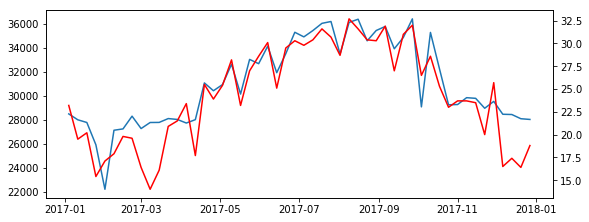

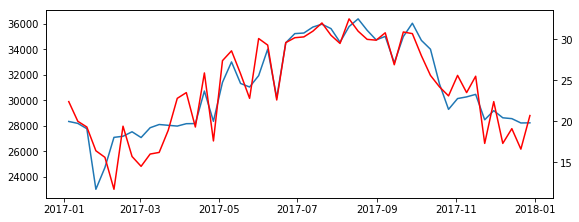

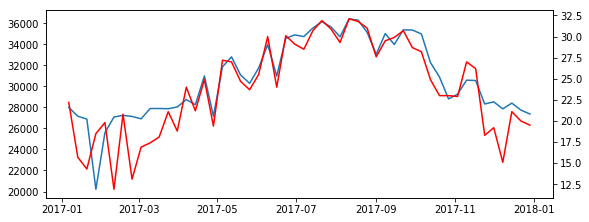

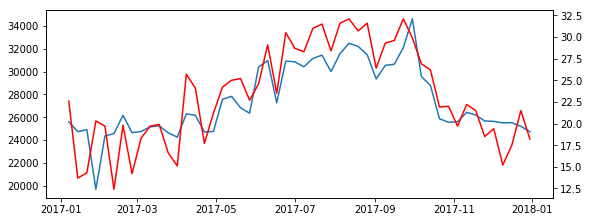

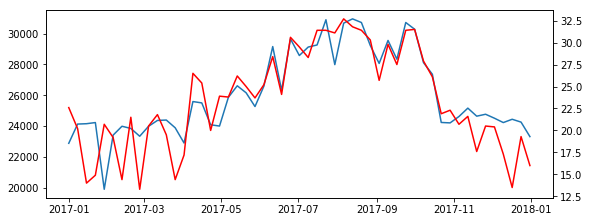

In [277]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
plt.plot(power2017_2018[Monday])
plt.twinx()
plt.plot(weather[Monday],color = 'red')
plt.figure(figsize=(20,20))
plt.subplot(5,2,2)
plt.plot(power2017_2018[Tuesday])
plt.twinx()
plt.plot(weather[Tuesday],color = 'red')
plt.figure(figsize=(20,20))
plt.subplot(5,2,3)
plt.plot(power2017_2018[Wednesday])
plt.twinx()
plt.plot(weather[Wednesday],color = 'red')
plt.figure(figsize=(20,20))
plt.subplot(5,2,4)
plt.plot(power2017_2018[Thursday])
plt.twinx()
plt.plot(weather[Thursday],color = 'red')
plt.figure(figsize=(20,20))
plt.subplot(5,2,5)
plt.plot(power2017_2018[Friday])
plt.twinx()
plt.plot(weather[Friday],color = 'red')
plt.figure(figsize=(20,20))
plt.subplot(5,2,6)
plt.plot(power2017_2018[Saturday])
plt.twinx()
plt.plot(weather[Saturday],color = 'red')
plt.figure(figsize=(20,20))
plt.subplot(5,2,7)
plt.plot(power2017_2018[Sunday])
plt.twinx()
plt.plot(weather[Sunday],color = 'red')

## 計算星期幾與之最高溫相關係數

In [81]:
corr_Monday = power2017_2018[Monday].corr(weather[Monday])
print("corr of Monday:" , corr_Monday)
corr_Tuesday = power2017_2018[Tuesday].corr(weather[Tuesday])
print("corr of Tuesday:" , corr_Tuesday)
corr_Wednesday = power2017_2018[Wednesday].corr(weather[Wednesday])
print("corr of Wednesday:" , corr_Wednesday)
corr_Thursday = power2017_2018[Thursday].corr(weather[Thursday])
print("corr of Thursday:" , corr_Thursday)
corr_Friday = power2017_2018[Friday].corr(weather[Friday])
print("corr of Friday:" , corr_Friday)
corr_Saturday = power2017_2018[Saturday].corr(weather[Saturday])
print("corr of Saturday:" , corr_Saturday)
corr_Sunday = power2017_2018[Sunday].corr(weather[Sunday])
print("corr of Monday:" , corr_Sunday)

corr of Monday: 0.7857004459349309
corr of Tuesday: 0.8240235639936907
corr of Wednesday: 0.8819948570865782
corr of Thursday: 0.8821345187099383
corr of Friday: 0.8183485159594807
corr of Saturday: 0.8088846318709236
corr of Monday: 0.8029010740138559


C:\Users\s1976\Anaconda3\lib\site-packages\pandas\core\series.py:850: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


## 由於之前只用2017年來觀察資料相關性，以下用2017與2018的電力尖峰負載與每日天氣最高溫度來做二次回歸

In [61]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d')
weather = pd.read_csv('weather.csv',encoding="utf_8_sig",engine='python',parse_dates=['date'],date_parser = dateparse,index_col= 0)
dateparse = lambda x: pd.datetime.strptime(x, '%Y%m%d')
df3 = pd.read_csv('20170101-20181231.csv',encoding="utf_8_sig",engine='python',parse_dates=['日期'],date_parser = dateparse,index_col= 0)
power2017_2018 = df3['尖峰負載(MW)']
weather = weather['T Max']

weekday = pd.Series(power2017_2018.index)
Sunday = []
Monday = []
Tuesday = []
Wednesday = []
Thursday = []
Friday = []
Saturday = []
for i in weekday:
    if i.weekday() == 0:
        Monday.append(i)
    elif i.weekday() == 1:
        Tuesday.append(i)
    elif i.weekday() == 2:
        Wednesday.append(i)
    elif i.weekday() == 3:
        Thursday.append(i)
    elif i.weekday() == 4:
        Friday.append(i)
    elif i.weekday() == 5:
        Saturday.append(i)
    else:
        Sunday.append(i)

## 將每個星期幾與其對應之最高溫度當作一個  model 來預測，所以有七個 model ，將來只要取得當日最高溫度就可預測電力尖峰負載

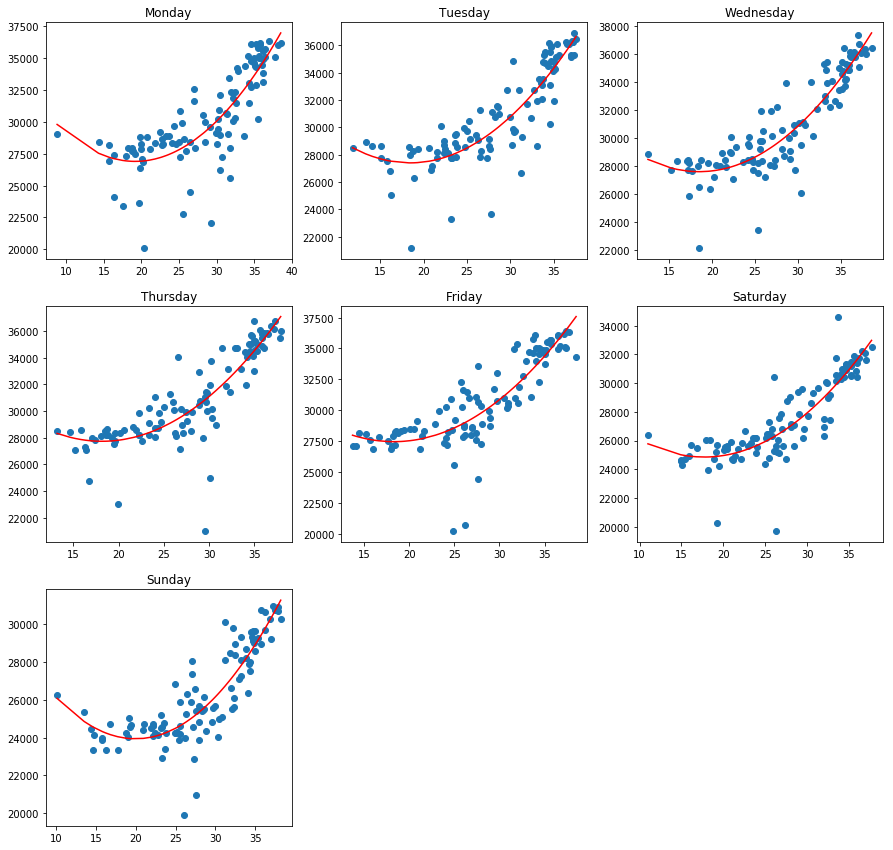

In [37]:
w = [Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday]
word = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
i = 1
model = [None]*7
plt.figure(figsize=(15,20))
for c in w:
    poly_features = PolynomialFeatures(degree=2)
    weather_poly = poly_features.fit_transform(weather[c].values.reshape(-1,1))
    weather_quadratic = poly_features.transform(weather[c].values.reshape(-1,1))
    
    model[i-1] = LinearRegression()
    model[i-1].fit(weather_quadratic, power2017_2018[c])
    power_predict = model[i-1].predict(weather_quadratic)
    
    plt.subplot(4,3,i)
    plt.title(word[i-1])
    plt.scatter(weather[c],power2017_2018[c])
    plt.plot(np.sort(weather[c].values),power_predict[np.argsort(weather[c].values)], 'r-')
    i += 1

## 預測 20190402-20190408 電力尖峰負載，並匯出 submission.csv

In [84]:
date = ['20190402','20190403','20190404','20190405','20190406','20190407','20190408']
predict_date = pd.to_datetime(date)
temp = [26,28,28,28,29,28,28]
result = []
for i in range(len(date)):
    poly_features.fit(temp[i])
    tt = poly_features.transform(temp[i])
    if predict_date[i].weekday() == 0:
        result.append(model[0].predict(tt))
    if predict_date[i].weekday() == 1:
        result.append(model[1].predict(tt))
    if predict_date[i].weekday() == 2:
        result.append(model[2].predict(tt))
    if predict_date[i].weekday() == 3:
        result.append(model[3].predict(tt))
    if predict_date[i].weekday() == 4:
        result.append(model[4].predict(tt))
    if predict_date[i].weekday() == 5:
        result.append(model[5].predict(tt))
    if predict_date[i].weekday() == 6:
        result.append(model[6].predict(tt))
for i in range(len(result)):
    result[i] = int(round(result[i][0]))
dit = {'date':date, 'peak_load(MW)':result}
df = pd.DataFrame(dit)
df.to_csv(r'./submission.csv',columns=['date','peak_load(MW)'],index=False,sep=',')